# Exploration and training of the Iris Dataset

### Uses Seaborn and pandas to explore the Iris dataset and find patterns between data of 150 Iris flowers of 3 different subspecies

Importing files and ignoring seaborn warnings, setting a simple seaborn style

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

Loading the dataset into df and printing the first 5 rows

In [2]:
df=pd.read_csv("../input/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Each species has 50 samples

In [3]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Simple scatter plot to see connections between sepal length/width and petal length/width

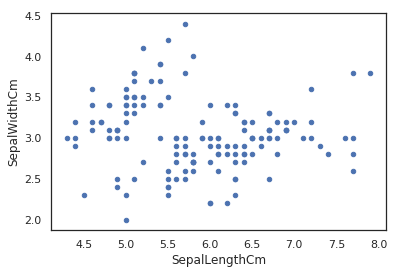

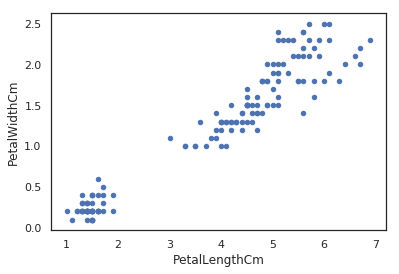

In [4]:
df.plot(kind='scatter',x="SepalLengthCm", y="SepalWidthCm")
df.plot(kind='scatter',x="PetalLengthCm", y="PetalWidthCm")

Data distribution in the above graph seems to be split into groups,
so we use a FacetGrid and set the 'hue' to the 'Species' column
This gives a different color to the points in the scatter plot based on their Species value

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


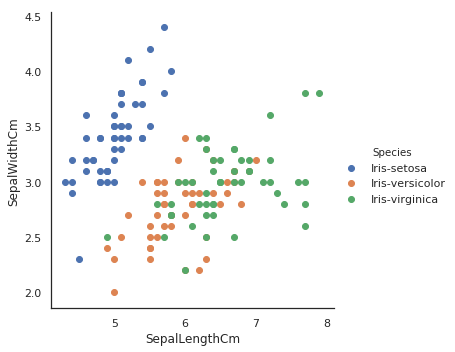

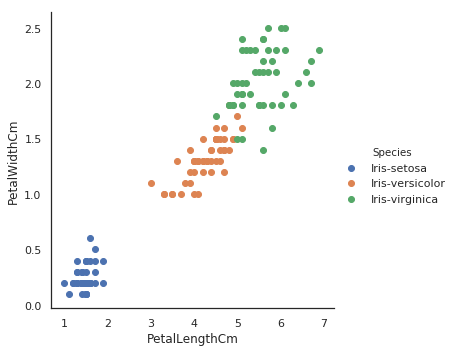

In [5]:
sns.FacetGrid(df, size=5,hue="Species").map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
sns.FacetGrid(df, size=5,hue="Species").map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

So from this plot we can see that Petal length and width play a very important differentiating factor
(iris setosa has small petal length and width, virginica has the largest)

Making a boxplot to see the distribution of petal length for each species

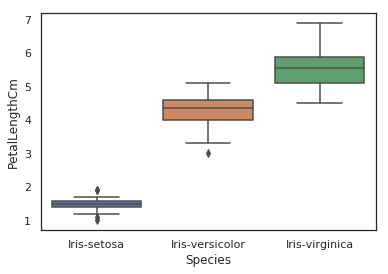

In [6]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

Boxplot of Petal Width species-wise

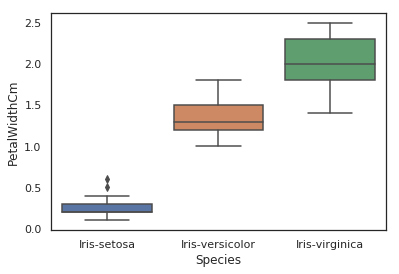

In [7]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

A stripplot with jitter so we can see the distribution of values more clearly.
Jitter=True makes it so the points don't fall in a straight line (in this plot X coord.s don't matter)

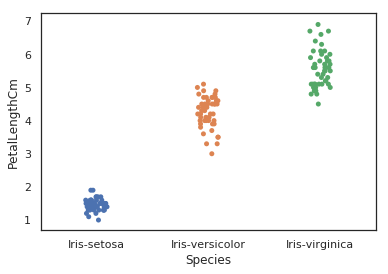

In [8]:
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

Violin plots are the combination of scatter plots and box plots.
We can see the density of distribution of values for the features

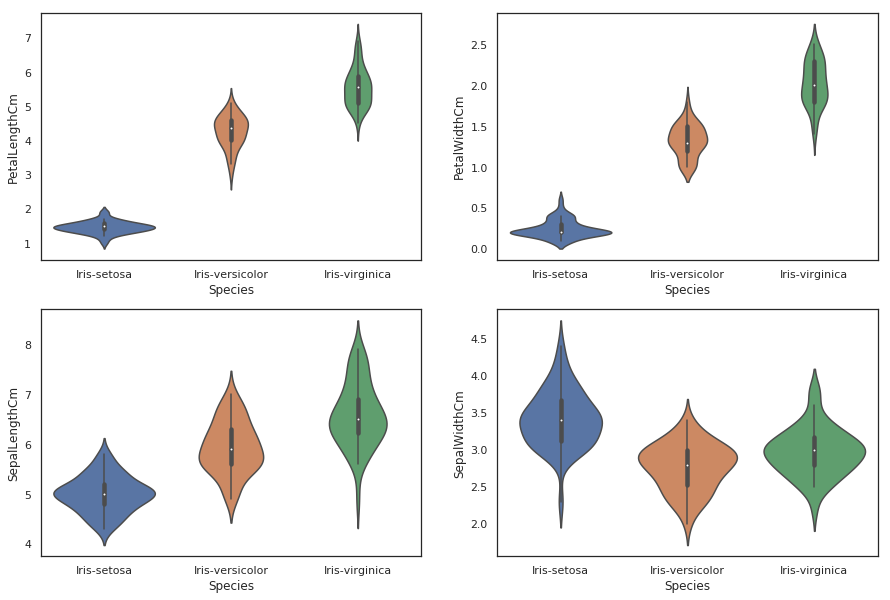

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

KDE: Kernel Density Estimate.
This shows the distribution density more clearly.
We use a FacetGrid with hue = 'Species'.
.add_legend() adds the legend on the top rights.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


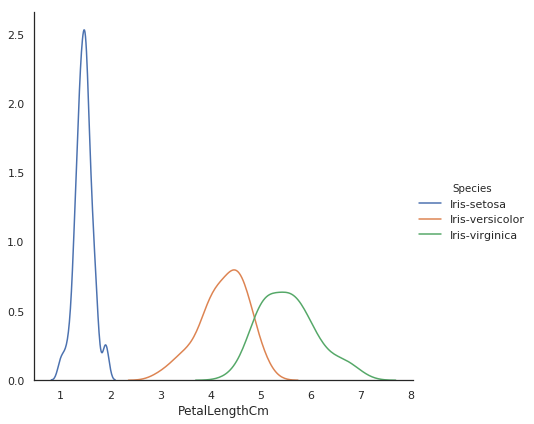

In [10]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs)with hue = "Species"

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


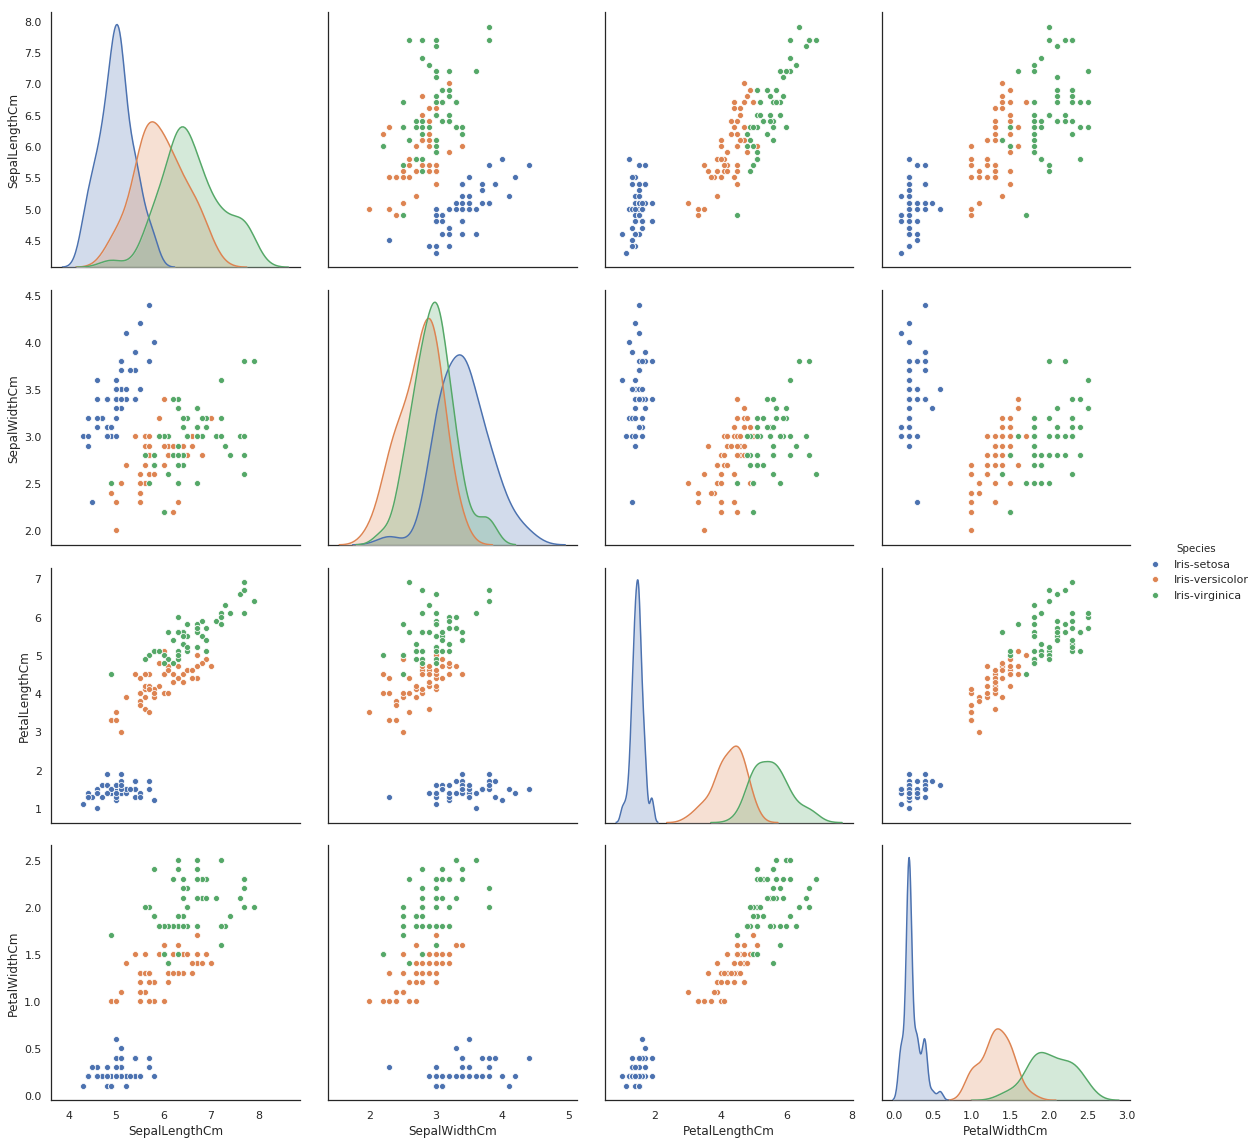

In [11]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=4)

# Training models

### We will use Logistic Regression and KNN
#### Train Test Split splits the data into 70:30 ratio. We will train the model on 70% of the data

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

Dropping the ID axis because it's not of use in training, and splitting the dataset

In [13]:
df.drop('Id',axis=1,inplace=True)
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


Creating the train and test datasets. X will be the input, y the output

In [14]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [15]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
51,6.4,3.2,4.5,1.5
9,4.9,3.1,1.5,0.1
81,5.5,2.4,3.7,1.0
113,5.7,2.5,5.0,2.0
132,6.4,2.8,5.6,2.2


Fitting the data on Logistic Regression:

In [16]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y)*100 ,'percent')

The accuracy of the Logistic Regression is 93.33333333333333 percent


Fitting the data on K Neighbors Classifier with neighbors=3

In [17]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100, 'percent')

The accuracy of the KNN is 91.11111111111111 percent
